In [14]:
import numpy as np
import matplotlib.pyplot as plt

probability_win = 0.25
DISCOUNT_FACTOR = 1
reward_table = np.zeros(101)
reward_table[100] = 1

class StrategyUpdater:
    def __init__(self):
        self.value_states = np.zeros(101)
        self.optimal_strategy = np.zeros(100, dtype=int)
        
    def calculate_value(self, position, bet, value_states):
        win_outcome = probability_win * (reward_table[position + bet] + DISCOUNT_FACTOR * value_states[position + bet])
        lose_outcome = (1 - probability_win) * (reward_table[position - bet] + DISCOUNT_FACTOR * value_states[position - bet])
        return win_outcome + lose_outcome

    def evaluate_strategy(self, tolerance=1e-14):
        while True:
            # TODO: Evaluate state values for the current strategy until convergence
            delta = 0
            new_value_states = self.value_states.copy()
            for position in range(1, 100):
                bet = self.optimal_strategy[position]
                if bet > 0:
                    new_value_states[position] = self.calculate_value(position, bet, self.value_states)
                delta = max(delta, abs(new_value_states[position] - self.value_states[position]))
            self.value_states = new_value_states
            if delta < tolerance:
                break
        return self.update_strategy()


    def evaluate_strategy_with_equations(self):
        matrix_coefficients = np.zeros((99, 99), dtype=np.float64)  # Coefficients matrix for linear equations
        vector_constants = np.zeros(99, dtype=np.float64)  # Constants vector for the equations
        for current_position in range(1, 100):  
            index_in_matrix = current_position - 1  # Zero-based index for the current position
            matrix_coefficients[index_in_matrix, index_in_matrix] = 1.0  # Diagonal element of the matrix
            max_bet = min(current_position, 100 - current_position)  # Maximum bet allowed for the position
            for current_bet in range(1, max_bet + 1): 
                if current_position + current_bet < 100:  # Check for valid forward bet.
                    matrix_coefficients[index_in_matrix, current_position + current_bet - 1] -= probability_win * DISCOUNT_FACTOR  # Adjust coefficient for winning forward bet
                else:
                    vector_constants[index_in_matrix] += probability_win  # Add probability if position exceeds upper limit
                if current_position - current_bet > 0:  
                    matrix_coefficients[index_in_matrix, current_position - current_bet - 1] -= (1 - probability_win) * DISCOUNT_FACTOR  # Adjust coefficient for losing backward bet
        value_vector = np.linalg.solve(matrix_coefficients, vector_constants)  # Solve the equations
        self.value_states[1:100] = value_vector  # Update the value states
        return self.update_strategy()  # Update the strategy based on the values
    
    def update_strategy(self):
        policy_stable = True  # Flag to check if the policy is stable
        for position in range(1, 100): 
            best_bet = 0  
            best_value = 0  
            max_action = min(position, 100 - position)  # Determine the maximum action (bet)
            for bet in range(1, max_action + 1): 
                value = self.calculate_value(position, bet, self.value_states) 
                if value > best_value:  # Check if this bet is better than the current best
                    best_value = value 
                    best_bet = bet  
            if self.optimal_strategy[position] != best_bet:  # Check if the best bet differs from the current strategy
                policy_stable = False 
            self.optimal_strategy[position] = best_bet  # Update the strategy with the best bet
        if not policy_stable:  # If the policy is not stable, re-evaluate the strategy
            return self.evaluate_strategy()
        return self.value_states, self.optimal_strategy 


[0.         0.18181818 0.33057851 0.45229151 0.55187487 0.63335217
 0.70001541 0.75455806 0.79918387 0.83569589 0.86556937 0.8900113
 0.91000925 0.9263712  0.93975826 0.9507113  0.95967288 0.96700509
 0.97300416 0.9779125  0.98192841 0.98521415 0.98790249 0.99010204
 0.99190167 0.99337409 0.9945788  0.99556447 0.99637093 0.99703076
 0.99757063 0.99801233 0.99837373 0.99866941 0.99891134 0.99910928
 0.99927123 0.99940373 0.99951214 0.99960085 0.99967342 0.9997328
 0.99978138 0.99982113 0.99985365 0.99988026 0.99990203 0.99991984
 0.99993442 0.99994634 0.9999561  0.99996408 0.99997061 0.99997596
 0.99998033 0.99998391 0.99998683 0.99998923 0.99999119 0.99999279
 0.9999941  0.99999517 0.99999605 0.99999677 0.99999736 0.99999784
 0.99999823 0.99999855 0.99999882 0.99999903 0.99999921 0.99999935
 0.99999947 0.99999957 0.99999965 0.99999971 0.99999976 0.99999981
 0.99999984 0.99999987 0.9999999  0.99999991 0.99999993 0.99999994
 0.99999995 0.99999996 0.99999997 0.99999998 0.99999998 0.999999

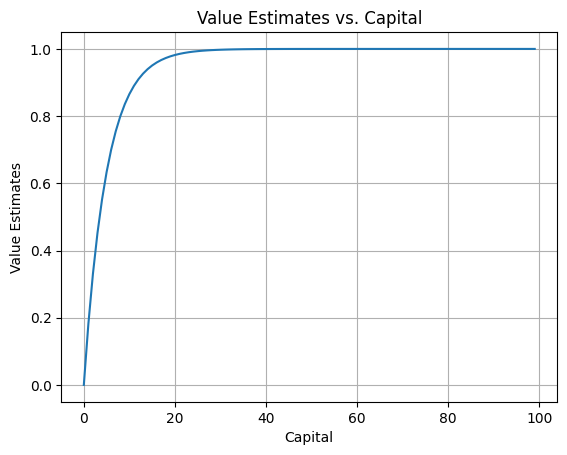

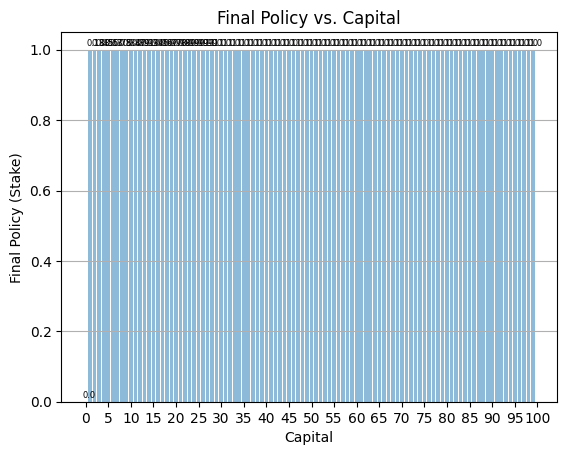

In [15]:

su = StrategyUpdater()
value_estimates, final_strategy = su.evaluate_strategy_with_equations()
# TODO: perform this once by solving equations too
print(value_estimates)
print(final_strategy)

# Plotting the value estimates
plt.plot(range(100), value_estimates[:100])
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value Estimates vs. Capital')
plt.grid(True)
plt.show()

# Plotting the final policy
plt.bar(range(100), final_strategy, align='center', alpha=0.5)
for idx in range(100):
    plt.text(idx - 0.75, final_strategy[idx] + 0.01, str(round(value_estimates[idx], 2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final Policy (Stake)')
plt.title('Final Policy vs. Capital')
plt.grid(axis='y')
plt.show()



In [11]:
probability_win = 0.25 
DISCOUNT_FACTOR = 1  
reward_table = np.zeros(101)  
reward_table[100] = 1  

class ValueCalculator:
    def __init__(self):
        self.value_states = np.zeros(101, dtype=np.float64) 
        self.optimal_strategy = np.zeros(100, dtype=np.float64)

    def calculate_value(self, position, bet, value_states):
        win_outcome = 0
        lose_outcome = 0
        if 1 <= position + bet <= 100:
            win_outcome = probability_win * (reward_table[position + bet] + DISCOUNT_FACTOR * value_states[position + bet])
        if 1 <= position - bet <= 100:
            lose_outcome = (1 - probability_win) * (reward_table[position - bet] + DISCOUNT_FACTOR * value_states[position - bet])
        return win_outcome + lose_outcome

    def perform_value_iteration(self, tolerance=1e-50):
        while True:
            delta = 0  # Initialize the maximum change in value between iterations
            for position in range(1, 100): 
                best_value = -float('inf')  # Initialize the best value for the current position

                for bet in range(1, min(position, 100 - position) + 1):  
                    value = self.calculate_value(position, bet, self.value_states)  # Calculate the value of this bet
                    if value > best_value:  # Check if this bet has the highest value so far
                        best_value = value  
                # Update the maximum change across all states.
                delta = max(delta, abs(self.value_states[position] - best_value))
                self.value_states[position] = best_value  # Update the value of the current state
            if delta < tolerance:  # If the maximum change is less than the tolerance, the values have converged
                break
        return self.perform_strategy_update()

    def perform_strategy_update(self):
        for position in range(1, 100): 
            best_bet = 0  # Initialize the best bet for the current position
            best_value = -float('inf')  
            for bet in range(1, min(position, 100 - position) + 1):
                value = self.calculate_value(position, bet, self.value_states)  
                if value > best_value:  # Check if this bet has the highest value so far
                    best_value = value 
                    best_bet = bet  
            self.optimal_strategy[position] = best_bet  # Set the optimal strategy for this position
        return self.value_states, self.optimal_strategy




[0.00000000e+00 7.28611683e-05 2.91444673e-04 6.95264571e-04
 1.16577869e-03 1.77125506e-03 2.78105828e-03 4.03661211e-03
 4.66311477e-03 5.60141644e-03 7.08502024e-03 9.04088770e-03
 1.11242331e-02 1.56796459e-02 1.61464484e-02 1.69534413e-02
 1.86524591e-02 1.98260623e-02 2.24056658e-02 2.73847344e-02
 2.83400810e-02 3.04945467e-02 3.61635508e-02 3.84959101e-02
 4.44969325e-02 6.25000000e-02 6.27185835e-02 6.33743340e-02
 6.45857937e-02 6.59973361e-02 6.78137652e-02 7.08431749e-02
 7.46098363e-02 7.64893443e-02 7.93042493e-02 8.37550607e-02
 8.96226631e-02 9.58726994e-02 1.09538938e-01 1.10939345e-01
 1.13360324e-01 1.18457377e-01 1.21978187e-01 1.29716997e-01
 1.44654203e-01 1.47520243e-01 1.53983640e-01 1.70990652e-01
 1.77987730e-01 1.95990798e-01 2.50000000e-01 2.50218584e-01
 2.50874334e-01 2.52085794e-01 2.53497336e-01 2.55313765e-01
 2.58343175e-01 2.62109836e-01 2.63989344e-01 2.66804249e-01
 2.71255061e-01 2.77122663e-01 2.83372699e-01 2.97038938e-01
 2.98439345e-01 3.008603

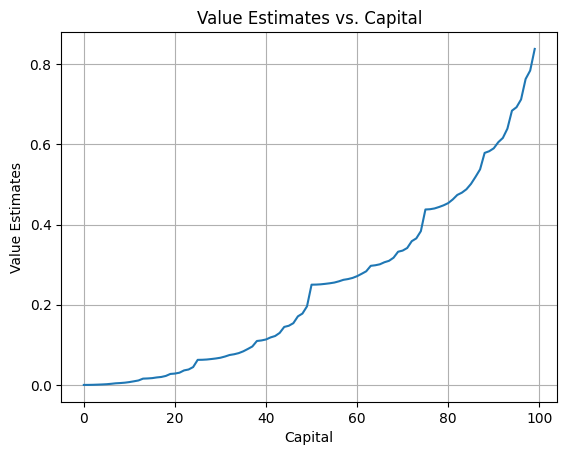

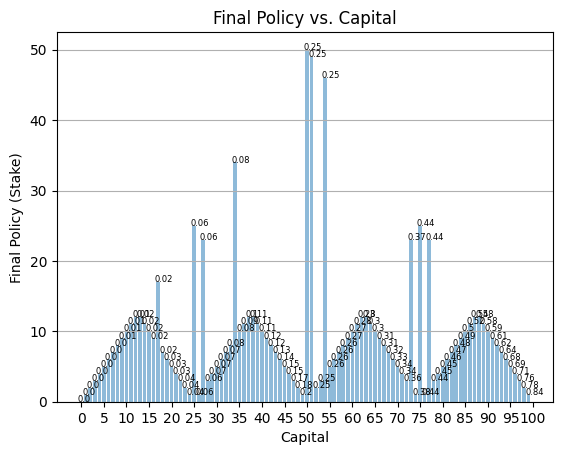

In [12]:
# Initialize and run value iteration
vc = ValueCalculator()
value_estimates, final_strategy = vc.perform_value_iteration()
print(value_estimates)
print(final_strategy)

# Plotting the value estimates
plt.plot(range(100), value_estimates[:100])
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value Estimates vs. Capital')
plt.grid(True)
plt.show()

# Plotting the final policy
plt.bar(range(100), final_strategy, align='center', alpha=0.5)
for idx in range(100):
    plt.text(idx - 0.75, final_strategy[idx] + 0.01, str(round(value_estimates[idx], 2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final Policy (Stake)')
plt.title('Final Policy vs. Capital')
plt.grid(axis='y')
plt.show()
